In [ ]:
# Here we take care of paths.

from pathlib import Path
import os
print('Starting path:' + os.getcwd())
if os.getcwd()[-16:] == 'image-to-tex-OCR':
    pass
else:
    PATH = Path().resolve().parents[0]
    os.chdir(PATH)

# make sure you are in Paragraph_to_Tex folder
print('Current path:' + os.getcwd())

In [ ]:
from Data.Data_Module import Data_Module
from Models.Printed_Tex_Transformer import ResNetTransformer
from Lightning_Models.Printed_Tex_Lit_Model import LitResNetTransformer
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from PIL import Image
import torch
from pytorch_lightning.loggers import TensorBoardLogger
from torchvision import transforms
from PIL import Image
from IPython.display import display, Math
from Data.image_transforms import Image_Transforms
import cv2
import cv2
import PIL
import numpy as np
transform = transforms.ToPILImage()


dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


In [ ]:
# Generate Data Module by uploading images and formulas
# images need to be in the folder Data/Data_Bank/generated_png_images
# formulas need to be in Data/Data_Bank/final_png_formulas.txt
# image filenames need to be in Data/Data_Bank/corresponding_png_images.txt

dataset = Data_Module(stage = 'fit',
                 set_max_label_length = 128,
                 number_png_images_to_use_in_dataset=250*1000,
                 labels_transform='default',
                image_transform_name ='alb',
                 train_val_fraction = 0.999,
                   vocabulary_path = 'Data/Data_Bank/230k.json',
                load_vocabulary = True,
                      image_padding = True,


                 batch_size = 128,
                num_workers = 8,
                data_on_gpu = True,
                )


In [ ]:
print( 
    'Vocabulary size:',len(dataset.vocabulary),
    '\nMax label length:', dataset.max_label_length,
    "\nStart <S> goes to index ",dataset.vocabulary['<S>'],
      "\nEnd <E> goes to index ",dataset.vocabulary['<E>'],
      "\nPadding <P> goes to index ",dataset.vocabulary['<P>'],
)

In [ ]:
MAX_RATIO = 15


# HELPER FUNCTIONS
def token_to_strings(tokens):
    mapping = dataset.vocabulary
    inverse_mapping =dataset.inverse_vocabulary
    s=''
    if tokens.shape[0] ==1:
        tokens = tokens[0]
    for number in tokens:
        letter = inverse_mapping[number.item()]
        s= s +" " + str(letter)
    return s
def findPositions(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = 255*(gray < 50).astype(np.uint8)  # To invert the text to white
    gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, np.ones((2, 2), dtype=np.uint8))  # Perform noise filtering
    coords = cv2.findNonZero(gray)  # Find all non-zero points (text)
    x, y, w, h = cv2.boundingRect(coords)  # Find minimum spanning bounding box
    # Crop the image - note we do this on the original image
    cropped_image = image[y-10:y+h+10, x-10:x+w+10]

    return cropped_image


In [ ]:
# Load with pytorch epoch=4-step=17280.ckpt

model = ResNetTransformer(dataset=dataset).to(dev)
model.load_state_dict(torch.load(("Models_Parameters_Log/Collate1.pth"), map_location=torch.device('cpu')))
lit_model = LitResNetTransformer(model=model, WandB=False)
scripted_save = lit_model.to_torchscript()
torch.jit.save(scripted_save, "Models_Parameters_Log/scripted_model1.pt")


In [ ]:
scripted = torch.jit.load("Models_Parameters_Log/scripted_model1.pt")

In [ ]:
image_path= "Jupyter_Notebooks/test_photos/zarhin.png"
image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
#image = findPositions(image)
print(display(transform(image)))


h, w, c = image.shape
ratio =int(w / h)
if ratio == 0:
    ratio = 1 
if ratio > MAX_RATIO:
    ratio = MAX_RATIO


new_h = 128
new_w = int(new_h * ratio)
if h >128:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
else:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)


    
image_tensor = Image_Transforms.test_transform_with_padding(image=np.array(image))['image'][:1]
print(image_tensor.shape)
print(display(transform(image_tensor))) 

#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')
prediction =  scripted(image_tensor.unsqueeze(0))
print(token_to_strings(prediction))
print(display(Math(token_to_strings(prediction))))

In [ ]:
image_path= "Jupyter_Notebooks/test_photos/zarhin.png"
image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
#image = findPositions(image)
print(display(transform(image)))


h, w, c = image.shape
ratio =int(w / h)
if ratio == 0:
    ratio = 1 
if ratio > MAX_RATIO:
    ratio = MAX_RATIO


new_h = 128
new_w = int(new_h * ratio)
if h >128:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
else:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)


    
image_tensor = Image_Transforms.test_transform_with_padding(image=np.array(image))['image'][:1]
print(image_tensor.shape)
print(display(transform(image_tensor))) 

#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')
prediction =  scripted(image_tensor.unsqueeze(0))
print(token_to_strings(prediction))
print(display(Math(token_to_strings(prediction))))

In [ ]:
image_path= "Jupyter_Notebooks/test_photos/zarhin.png"
image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
#image = findPositions(image)
print(display(transform(image)))


h, w, c = image.shape
ratio =int(w / h)
if ratio == 0:
    ratio = 1 
if ratio > MAX_RATIO:
    ratio = MAX_RATIO


new_h = 128
new_w = int(new_h * ratio)
if h >128:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
else:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)


    
image_tensor = Image_Transforms.test_transform_with_padding(image=np.array(image))['image'][:1]
print(image_tensor.shape)
print(display(transform(image_tensor))) 

#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')
prediction =  scripted(image_tensor.unsqueeze(0))
print(token_to_strings(prediction))
print(display(Math(token_to_strings(prediction))))

In [ ]:
image_path= "Jupyter_Notebooks/test_photos/screenshot_1.png"
image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
#image = findPositions(image)
print(display(transform(image)))


h, w, c = image.shape
ratio =int(w / h)
if ratio == 0:
    ratio = 1 
if ratio > MAX_RATIO:
    ratio = MAX_RATIO


new_h = 128
new_w = int(new_h * ratio)
if h >128:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
else:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)


    
image_tensor = Image_Transforms.test_transform_with_padding(image=np.array(image))['image'][:1]
print(image_tensor.shape)
print(display(transform(image_tensor))) 

#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')
prediction =  scripted(image_tensor.unsqueeze(0))
print(token_to_strings(prediction))
print(display(Math(token_to_strings(prediction))))

In [ ]:
image_path= "Jupyter_Notebooks/test_photos/screenshot_1.png"
image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
#image = findPositions(image)
print(display(transform(image)))


h, w, c = image.shape
ratio =int(w / h)
if ratio == 0:
    ratio = 1 
if ratio > MAX_RATIO:
    ratio = MAX_RATIO


new_h = 128
new_w = int(new_h * ratio)
if h >128:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
else:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)


    
image_tensor = Image_Transforms.test_transform_with_padding(image=np.array(image))['image'][:1]
print(image_tensor.shape)
print(display(transform(image_tensor))) 

#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')
prediction =  scripted(image_tensor.unsqueeze(0))
print(token_to_strings(prediction))
print(display(Math(token_to_strings(prediction))))

In [ ]:
image_path= "Jupyter_Notebooks/test_photos/0a0df4c4229b725.png"
image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
#image = findPositions(image)
print(display(transform(image)))


h, w, c = image.shape
ratio =int(w / h)
if ratio == 0:
    ratio = 1 
if ratio > MAX_RATIO:
    ratio = MAX_RATIO


new_h = 128
new_w = int(new_h * ratio)
if h >128:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
else:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)


    
image_tensor = Image_Transforms.test_transform_with_padding(image=np.array(image))['image'][:1]
print(image_tensor.shape)
print(display(transform(image_tensor))) 

#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')
prediction =  scripted(image_tensor.unsqueeze(0))
print(token_to_strings(prediction))
print(display(Math(token_to_strings(prediction))))

In [ ]:
image_path= "Jupyter_Notebooks/test_photos/0a0ebebfb1f6ab3.png"
image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
#image = findPositions(image)
print(image.shape)
print(display(transform(image)))


h, w, c = image.shape
ratio =int(w / h)
if ratio == 0:
    ratio = 1 
if ratio > MAX_RATIO:
    ratio = MAX_RATIO


new_h = 128
new_w = int(new_h * ratio)
if h >128:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
else:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)


    
image_tensor = Image_Transforms.test_transform_with_padding(image=np.array(image))['image'][:1]
print(image_tensor.shape)
print(display(transform(image_tensor))) 

#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')
prediction =  scripted(image_tensor.unsqueeze(0))
print(token_to_strings(prediction))
print(display(Math(token_to_strings(prediction))))

In [ ]:

image_path= "Jupyter_Notebooks/test_photos/Screen Shot_11.png"
image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
#image = findPositions(image)
print(display(transform(image)))


h, w, c = image.shape
ratio =(w / h)
print(ratio)
if ratio == 0:
    ratio = 1 
if ratio > MAX_RATIO:
    ratio = MAX_RATIO


new_h = 128
new_w = int(new_h * ratio)
if h >128:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
else:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)


    
image_tensor = Image_Transforms.test_transform_with_padding(image=np.array(image))['image'][:1]
print(image_tensor.shape)
print(display(transform(image_tensor))) 

#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')
prediction =  scripted(image_tensor.unsqueeze(0))
print(token_to_strings(prediction))
print(display(Math(token_to_strings(prediction))))

In [ ]:
image_path= "Jupyter_Notebooks/test_photos/Screen Shot_12.png"
image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
#image = findPositions(image)
print(display(transform(image)))


h, w, c = image.shape
ratio =(w / h)
if ratio == 0:
    ratio = 1 
if ratio > MAX_RATIO:
    ratio = MAX_RATIO


new_h = 128
new_w = int(new_h * ratio)
if h >128:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
else:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)


    
image_tensor = Image_Transforms.test_transform_with_padding(image=np.array(image))['image'][:1]
print(image_tensor.shape)
print(display(transform(image_tensor))) 

#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')
prediction =  scripted(image_tensor.unsqueeze(0))
print(token_to_strings(prediction))
print(display(Math(token_to_strings(prediction))))

In [ ]:
image_path= "Jupyter_Notebooks/test_photos/screenshot_3.png"
image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
#image = findPositions(image)
print(display(transform(image)))


h, w, c = image.shape
ratio =(w / h)
if ratio == 0:
    ratio = 1 
if ratio > MAX_RATIO:
    ratio = MAX_RATIO


new_h = 128
new_w = int(new_h * ratio)
if h >128:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
else:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)


    
image_tensor = Image_Transforms.test_transform_with_padding(image=np.array(image))['image'][:1]
print(image_tensor.shape)
print(display(transform(image_tensor))) 

#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')
prediction =  scripted(image_tensor.unsqueeze(0))
print(token_to_strings(prediction))
print(display(Math(token_to_strings(prediction))))

In [ ]:
image_path= "Jupyter_Notebooks/test_photos/screenshot_3.png"
image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
#image = findPositions(image)
print(display(transform(image)))


h, w, c = image.shape
ratio =int(w / h)
if ratio == 0:
    ratio = 1 
if ratio > MAX_RATIO:
    ratio = MAX_RATIO


new_h = 128
new_w = int(new_h * ratio)
if h >128:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
else:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)


    
image_tensor = Image_Transforms.test_transform_with_padding(image=np.array(image))['image'][:1]
print(image_tensor.shape)
print(display(transform(image_tensor))) 

#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')
prediction =  scripted(image_tensor.unsqueeze(0))
print(token_to_strings(prediction))
print(display(Math(token_to_strings(prediction))))

In [ ]:
image_path= "Jupyter_Notebooks/test_photos/Screen Shot_14.png"
image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
#image = findPositions(image)
print(display(transform(image)))


h, w, c = image.shape
ratio =int(w / h)
if ratio == 0:
    ratio = 1 
if ratio > MAX_RATIO:
    ratio = MAX_RATIO


new_h = 128
new_w = int(new_h * ratio)
if h >128:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
else:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)


    
image_tensor = Image_Transforms.test_transform_with_padding(image=np.array(image))['image'][:1]
print(image_tensor.shape)
print(display(transform(image_tensor))) 

#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')
prediction =  scripted(image_tensor.unsqueeze(0))
print(token_to_strings(prediction))
print(display(Math(token_to_strings(prediction))))

In [ ]:
image_path= "Jupyter_Notebooks/test_photos/Screen Shot_13.png"
image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
#image = findPositions(image)
print(display(transform(image)))


h, w, c = image.shape
ratio =int(w / h)
if ratio == 0:
    ratio = 1 
if ratio > MAX_RATIO:
    ratio = MAX_RATIO


new_h = 41
new_w = int(new_h * ratio)
if h >128:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
else:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)


    
image_tensor = Image_Transforms.test_transform_with_padding(image=np.array(image))['image'][:1]
print(image_tensor.shape)
print(display(transform(image_tensor))) 

#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')
prediction =  scripted(image_tensor.unsqueeze(0))
print(token_to_strings(prediction))
print(display(Math(token_to_strings(prediction))))

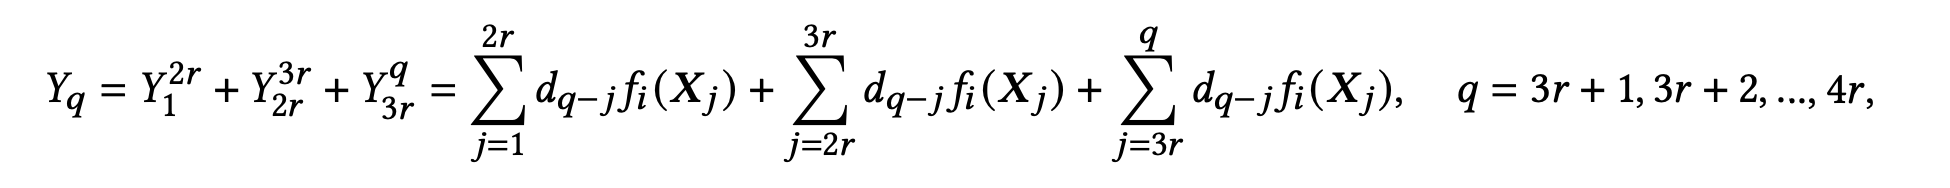

None
torch.Size([1, 128, 1280])


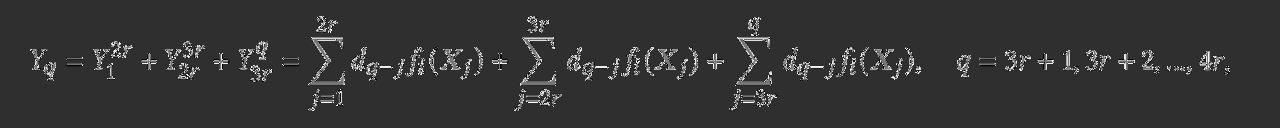

None

Predicted formula:
 <S> \begin{array} { c c c c c c c c } { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & { } & {


<IPython.core.display.Math object>

None


In [29]:
image_path=  "Jupyter_Notebooks/test_photos/Screen Shot_10.png"
image = Image.open(image_path).convert('RGB')
image = np.asarray(image)
#image = findPositions(image)
print(display(transform(image)))


h, w, c = image.shape
ratio =int(w / h)
if ratio == 0:
    ratio = 1 
if ratio > MAX_RATIO:
    ratio = MAX_RATIO


new_h = 128
new_w = int(new_h * ratio)
if h >128:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
else:
    image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)


    
image_tensor = Image_Transforms.test_transform_with_padding(image=np.array(image))['image'][:1]
print(image_tensor.shape)
print(display(transform(image_tensor))) 

#prediction =  scripted_model(my_image_tensor.unsqueeze(0).to(dev))
print('\nPredicted formula:')
prediction =  scripted(image_tensor.unsqueeze(0))
print(token_to_strings(prediction))
print(display(Math(token_to_strings(prediction))))